<div style="background-color:blue; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h1 align="center" style="color:#ffffff;"><b>Arabic Handwritten Characters Classification 📝</b></h1>
</div>

<div style="background-color:#000000; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <img src="https://media.tenor.com/uIz3tgHvvk4AAAAd/words-arabic.gif" alt="Animated GIF">
</div>

In [1]:
!pip3 install -q numpy pandas matplotlib seaborn plotly tensorflow && clear

<div style="background-color:blue; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#ffffff;"><b>IMPORT DEPENDENCIES</b></h2>
</div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix
import cv2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div style="background-color:blue; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#ffffff;"><b>DATA PRE-PROCESSING AND EDA</b></h2>
</div>

In [3]:
Train_Images = pd.read_csv("/kaggle/input/ahcd1/csvTrainImages 13440x1024.csv")
Train_Labels = pd.read_csv("/kaggle/input/ahcd1/csvTrainLabel 13440x1.csv")

In [4]:
Test_Images = pd.read_csv("/kaggle/input/ahcd1/csvTestImages 3360x1024.csv")
Test_Labels = pd.read_csv("/kaggle/input/ahcd1/csvTestLabel 3360x1.csv")

In [5]:
print(f"Train Iamges : {Train_Images.shape}")
print(f"Test  Iamges : {Test_Images.shape}")

Train Iamges : (13439, 1024)
Test  Iamges : (3359, 1024)


In [6]:
print(f"Train Labels : {Train_Labels.shape}")
print(f"Test  Labels : {Test_Labels.shape}")

Train Labels : (13439, 1)
Test  Labels : (3359, 1)


In [7]:
Train_Images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13439 entries, 0 to 13438
Columns: 1024 entries, 0 to 0.905
dtypes: int64(1024)
memory usage: 105.0 MB


In [8]:
Train_Labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13439 entries, 0 to 13438
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       13439 non-null  int64
dtypes: int64(1)
memory usage: 105.1 KB


In [9]:
Test_Images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Columns: 1024 entries, 0 to 0.928
dtypes: int64(1024)
memory usage: 26.2 MB


In [10]:
Test_Labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       3359 non-null   int64
dtypes: int64(1)
memory usage: 26.4 KB


In [11]:
Train_Images.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.896,0.897,0.898,0.899,0.900,0.901,0.902,0.903,0.904,0.905
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
Train_Images.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.901    0
0.902    0
0.903    0
0.904    0
0.905    0
Length: 1024, dtype: int64

In [13]:
Test_Images.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.924    0
0.925    0
0.926    0
0.927    0
0.928    0
Length: 1024, dtype: int64

In [14]:
Train_Labels.isnull().sum()

1    0
dtype: int64

In [15]:
Test_Labels.isnull().sum()

1    0
dtype: int64

In [16]:
value_counts_data = Train_Labels.value_counts()

fig = go.Figure(data=[go.Pie(
    labels=value_counts_data.index,
    values=value_counts_data.values,
    textinfo='label+percent',
    insidetextorientation='radial',
    hole=0.6,
    marker=dict(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], line=dict(color='#ffffff', width=1)),
)])

fig.update_layout(
    title='Train Labels Value Counts',
    font=dict(color='white'),
    paper_bgcolor='black',
    plot_bgcolor='black',
)

fig.show()


In [17]:
arabic_chars = ['alef','beh','teh','theh','jeem','hah','khah','dal','thal','reh','zain','seen','sheen','sad','dad','tah','zah','ain','ghain','feh','qaf','kaf','lam','meem','noon','heh','waw','yeh']
print(len(arabic_chars))

28


In [18]:
x_train = Train_Images.to_numpy()
y_train = Train_Labels.to_numpy()-1 

x_test = Test_Images.to_numpy()
y_test = Test_Labels.to_numpy()-1
print(f"X_Train Shape : {x_train.shape}")
print(f"X_Test  Shape : {x_test.shape}")
print(f"Y_Train Shape : {y_train.shape}")
print(f"Y_Test  Shape : {y_test.shape}")

X_Train Shape : (13439, 1024)
X_Test  Shape : (3359, 1024)
Y_Train Shape : (13439, 1)
Y_Test  Shape : (3359, 1)


In [19]:
x_train = x_train.reshape(-1,32,32,1)
x_test  = x_test.reshape(-1,32,32,1)

x_train = x_train / 255.0
x_test  = x_test / 255.0

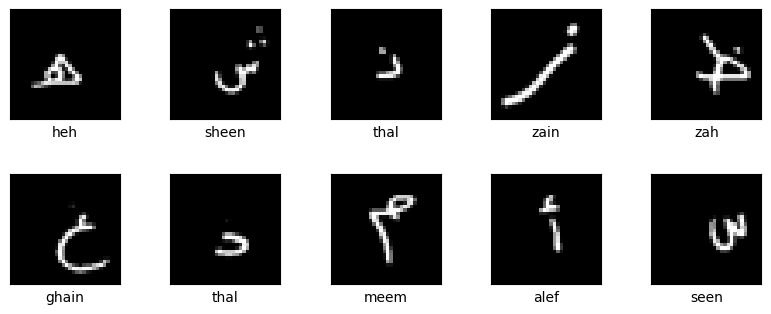

In [20]:
ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32, 32).T, "gray")
    plt.xlabel(arabic_chars[int(y_train[ra[i]][0])], fontsize=10, color='black', ha='center')
    plt.subplots_adjust(hspace=0.5)
plt.show()

In [21]:
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
print(y_train.shape, y_test.shape)

(13439, 28) (3359, 28)


<div style="background-color:blue; border-radius:2px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center">
    <h2 align="center" style="color:#ffffff;"><b>MODEL ENGINEERING</b></h2>
</div>

In [22]:
model = Sequential()

model.add(Conv2D(32, (5, 5), padding="same", activation="relu", input_shape=(32, 32, 1)))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(Conv2D(64, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(28, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 12, 12, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        5

In [23]:
model_summary = []
model.summary(print_fn=lambda x: model_summary.append(x))

table = go.Table(
    header=dict(values=['Layer (type)', 'Output Shape', 'Param #'],
                fill_color='rgb(55, 55, 55)',
                font=dict(color='white')),
    cells=dict(values=[model_summary[1:], model_summary[2:], model_summary[3:]],
               fill_color='rgb(35, 35, 35)',
               font=dict(color='white'))
)

layout = go.Layout(
    title='Model Summary',
    width=800,
    height=400,
    font=dict(color='white'),
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(0, 0, 0)'
)

fig = go.Figure(data=[table], layout=layout)

fig.show()


In [24]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)
train_gen = datagen.flow(x_train, y_train, batch_size=64)
test_gen  = datagen.flow(x_test , y_test , batch_size=64)

In [25]:
model_checkpoint_callback = ModelCheckpoint(
    filepath="best.hdf5",
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

history = model.fit(
    train_gen,
    epochs=50,
    verbose=1,
    steps_per_epoch=x_train.shape[0] // 64,
    validation_data=test_gen,
    validation_steps=x_test.shape[0] // 64,
    callbacks=[model_checkpoint_callback]
)
print("Train Success!!")

Epoch 1/50
208/209 [============================>.] - ETA: 0s - loss: 2.1449 - accuracy: 0.3330
Epoch 1: val_accuracy improved from -inf to 0.04688, saving model to best.hdf5
209/209 [==============================] - 21s 36ms/step - loss: 2.1399 - accuracy: 0.3344 - val_loss: 7.2457 - val_accuracy: 0.0469
Epoch 2/50
  3/209 [..............................] - ETA: 5s - loss: 1.1208 - accuracy: 0.6094

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



209/209 [==============================] - ETA: 0s - loss: 0.9255 - accuracy: 0.6835
Epoch 2: val_accuracy improved from 0.04688 to 0.28305, saving model to best.hdf5
209/209 [==============================] - 7s 33ms/step - loss: 0.9255 - accuracy: 0.6835 - val_loss: 3.0654 - val_accuracy: 0.2831
Epoch 3/50
208/209 [============================>.] - ETA: 0s - loss: 0.5690 - accuracy: 0.8118
Epoch 3: val_accuracy improved from 0.28305 to 0.70042, saving model to best.hdf5
209/209 [==============================] - 7s 32ms/step - loss: 0.5687 - accuracy: 0.8119 - val_loss: 0.9507 - val_accuracy: 0.7004
Epoch 4/50
208/209 [============================>.] - ETA: 0s - loss: 0.4069 - accuracy: 0.8676
Epoch 4: val_accuracy improved from 0.70042 to 0.81701, saving model to best.hdf5
209/209 [==============================] - 7s 32ms/step - loss: 0.4057 - accuracy: 0.8680 - val_loss: 0.5560 - val_accuracy: 0.8170
Epoch 5/50
208/209 [============================>.] - ETA: 0s - loss: 0.3320 - ac

In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=history.epoch, y=history.history['accuracy'], name='Accuracy'))
fig.add_trace(go.Scatter(x=history.epoch, y=history.history['val_accuracy'], name='Validation Accuracy'))

fig.update_layout(
    title='Training and Validation Accuracy',
    xaxis_title='Epoch',
    yaxis_title='Accuracy',
    legend=dict(x=0.7, y=0.9),
    width=800,
    height=600,
    plot_bgcolor='rgb(17,17,17)',
    paper_bgcolor='rgb(17,17,17)',
    font=dict(color='white')  
)

fig.show()


105/105 [==============================] - 1s 4ms/step


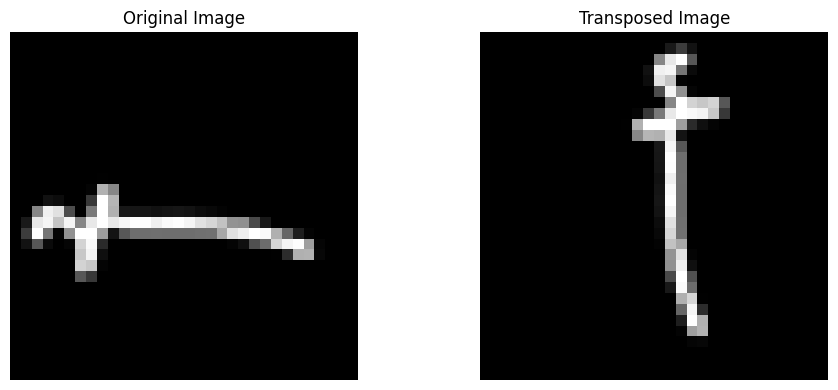

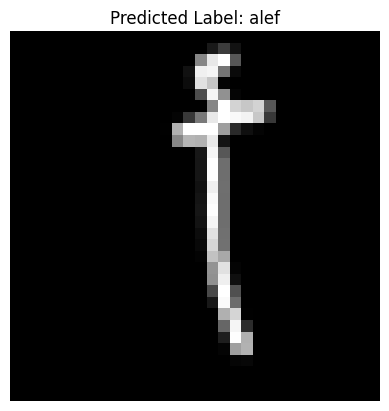

In [27]:
x_test_reshaped = x_test.reshape(-1, 32, 32, 1)

pred = model.predict(x_test_reshaped)

predicted_label = arabic_chars[np.argmax(pred[0])]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(x_test[0].reshape(32, 32), cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(x_test[0].reshape(32, 32).T, cmap='gray')
plt.axis('off')
plt.title('Transposed Image')

plt.tight_layout()
plt.show()

plt.imshow(x_test[0].reshape(32, 32).T, cmap='gray')
plt.title(f'Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()

In [28]:
y_preds = model.predict(x_test)
y_pred_classes = np.argmax(y_preds, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)


text = [[f"{cm[i, j]}<br>Correlation: {cm[i, j] / sum(cm[i, :]):.2f}" for j in range(len(cm[i]))] for i in range(len(cm))]

heatmap = go.Heatmap(
    z=cm,
    x=arabic_chars,
    y=arabic_chars,
    colorscale='Viridis',
    text=text,  
    showscale=False,  
    hoverongaps=False,
)

fig_cm = go.Figure(data=[heatmap])
fig_cm.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    width=800,
    height=600,
    template='plotly_dark',
    xaxis=dict(
        showgrid=True,
        gridwidth=1,  
        gridcolor='white'  
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,  
        gridcolor='white'  
    )
)
fig_cm.update_traces(hovertemplate='%{text}<extra></extra>') 
fig_cm.show()

105/105 [==============================] - 0s 2ms/step


In [29]:
model.save('saved_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [30]:
def predict_image(image_path, model_path):
    model = load_model(model_path)

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32))
    img = img.reshape(1, 32, 32, 1)
    img = img.astype('float32') / 255.0

    pred = model.predict(img)
    predicted_label = arabic_chars[np.argmax(pred)]

    return predicted_label

def plot_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()


In [31]:
image_path = '/kaggle/input/ahcd1/Test Images 3360x32x32/test/id_1027_label_10.png'
model_path = '/kaggle/working/saved_model.h5'

prediction = predict_image(image_path, model_path)
print('Predicted label:', prediction)

1/1 [==============================] - 0s 328ms/step
Predicted label: reh


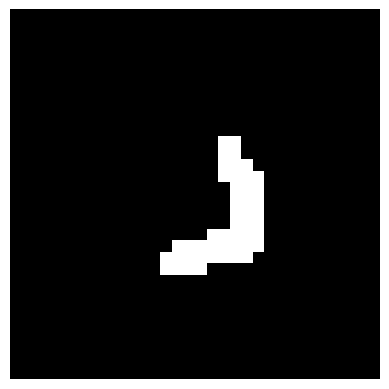

In [32]:
plot_image(image_path)